In [81]:
import cgcnn.cgcnn.model
import torch

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [82]:

class TwoLayerFC(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        """

        """
        super(TwoLayerFC, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
#         self.bn1 = nn.BatchNorm1d(input_dim)
#         self.bn2 = nn.BatchNorm1d(hidden_dim)

    def forward(self, inputs):
        """
        """
        # TODO will there be problems with the index zero padding?
        hidden1 = F.relu(self.fc1(inputs))
        out = self.fc2(hidden1)
        return out


In [83]:
model = TwoLayerFC(1,300,1)

model.train()


TwoLayerFC(
  (fc1): Linear(in_features=1, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=1, bias=True)
)

In [84]:
optimizer = optim.SGD(model.parameters(), 0.001,0.9)

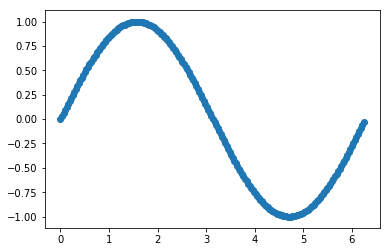

In [85]:
xs = np.zeros((200,1))
ys = np.zeros((200,1))

for i in range(200):
    xs[i] = 0 + i /200 * 2*np.pi
    ys[i] = np.sin(xs[i])
plt.scatter(xs,ys)
plt.show()

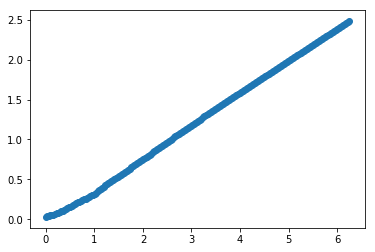

In [86]:
prediction = model(Variable(torch.Tensor(xs)))
plt.scatter(xs,prediction.data.numpy())
plt.show()

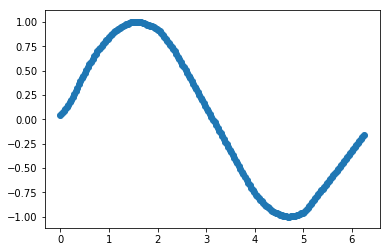

In [87]:
num_epochs = 10000
for _ in range(num_epochs):

        input_var = Variable(torch.Tensor(xs))
        target_var = Variable(torch.Tensor(ys))
        

        # compute output
        output = model(input_var)
        loss = F.mse_loss(output, target_var)

        # compute gradient and do SGD stepr
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # measure elapsed time
prediction = model(Variable(torch.Tensor(xs)))
plt.scatter(xs,prediction.data.numpy())
plt.show()

In [88]:
print([p.requires_grad for p in model.fc1.parameters()])
print([p.requires_grad for p in model.fc2.parameters()])

[True, True]
[True, True]


In [89]:
for p in model.fc1.parameters():
    p.requires_grad = False


old_fc2_weights, old_fc2_bias = [p for p in model.fc2.parameters()]
old_fc2_weights, old_fc2_bias = old_fc2_weights.data.numpy(), old_fc2_bias.data.numpy()

model.fc2 = nn.Linear(model.hidden_dim, model.output_dim)

new_wt2, new_bias2 = [p for p in model.fc2.parameters()]
print(np.allclose(new_wt2.data.numpy(), old_fc2_weights))
print(np.allclose(new_bias2.data.numpy(), old_fc2_bias))

False
False


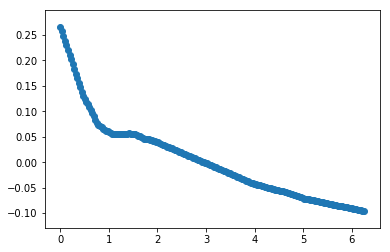

In [90]:
prediction = model(Variable(torch.Tensor(xs)))
plt.scatter(xs,prediction.data.numpy())
plt.show()

In [91]:

old_fc1_weights, old_fc1_bias = [p for p in model.fc1.parameters()]
old_fc1_weights, old_fc1_bias = np.copy(old_fc1_weights.data.numpy()), np.copy(old_fc1_bias.data.numpy())
old_fc2_weights, old_fc2_bias = [p for p in model.fc2.parameters()]
old_fc2_weights, old_fc2_bias = np.copy(old_fc2_weights.data.numpy()), np.copy(old_fc2_bias.data.numpy())

True
True
False
False


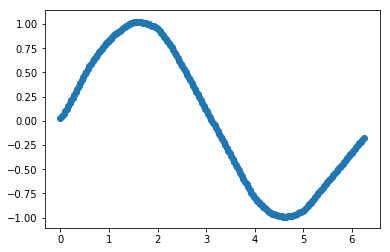

In [94]:
num_epochs = 10000

optimizer = optim.SGD([p for p in model.parameters() if p.requires_grad], 0.001,0.9)

for _ in range(num_epochs):

        input_var = Variable(torch.Tensor(xs))
        target_var = Variable(torch.Tensor(ys))
        

        # compute output
        output = model(input_var)
        loss = F.mse_loss(output, target_var)

        # compute gradient and do SGD step
        optimizer.zero_grad()
#         print([p.grad for p in model.fc2.parameters()])
        loss.backward()
#         print([p.grad for p in model.fc2.parameters()])
        optimizer.step()
#         print(loss)

new_wt1, new_bias1 = [p for p in model.fc1.parameters()]
print(np.array_equal(new_wt1.data.numpy(), old_fc1_weights))
print(np.array_equal(new_bias1.data.numpy(), old_fc1_bias))
new_wt2, new_bias2 = [p for p in model.fc2.parameters()]
print(np.array_equal(new_wt2.data.numpy(), old_fc2_weights))
print(np.array_equal(new_bias2.data.numpy(), old_fc2_bias))


prediction = model(Variable(torch.Tensor(xs)))
plt.scatter(xs,prediction.data.numpy())
plt.show()

In [45]:

print([p.requires_grad for p in model.fc1.parameters()])
print([p.requires_grad for p in model.fc2.parameters()])

True
True
[False, False]
[True, True]


In [23]:




print([type(p) for p in model.parameters()])
dir(model.fc1)

[<class 'torch.nn.parameter.Parameter'>, <class 'torch.nn.parameter.Parameter'>, <class 'torch.nn.parameter.Parameter'>, <class 'torch.nn.parameter.Parameter'>, <class 'torch.nn.parameter.Parameter'>, <class 'torch.nn.parameter.Parameter'>, <class 'torch.nn.parameter.Parameter'>, <class 'torch.nn.parameter.Parameter'>]


['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_all_buffers',
 '_apply',
 '_backend',
 '_backward_hooks',
 '_buffers',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_modules',
 '_parameters',
 '_slow_forward',
 '_tracing_name',
 'add_module',
 'apply',
 'bias',
 'children',
 'cpu',
 'cuda',
 'double',
 'dump_patches',
 'eval',
 'float',
 'forward',
 'half',
 'in_features',
 'load_state_dict',
 'modules',
 'named_children',
 'named_modules',
 'named_parameters',
 'out_features',
 'parameters',
 'register_backward_hook',
 'register_buffer',
 'register_forward_hook',
 'register_forward_pre_hook',
 'register_parameter',
 'reset